<div style="color:white;display:fill;border-radius:8px;
            background-color:#2a2a2ad9;font-size:190%;
            font-family:Segoe UI;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>MACHINE LEARNIG PREDICTION & COHORT ANALYSIS - HOTEL IN LISBON </b></p>
</div>. 

**A cohort** is a group of subjects who share a defining characteristic. We can observe how a cohort behaves across time and compare it to other cohorts. Cohorts are used in medicine, psychology, econometrics, ecology and many other areas to perform a cross-section (compare difference across subjects) at intervals through time.

**Types of cohorts**:

* **Time Cohorts** are customers who signed up for a product or service during a particular time frame. Analyzing these cohorts shows the customers’ behavior depending on the time they started using the company’s products or services. The time may be monthly or quarterly even daily.
* **Behaviour cohorts** are customers who purchased a product or subscribed to a service in the past. It groups customers by the type of product or service they signed up. Customers who signed up for basic level services might have different needs than those who signed up for advanced services. Understaning the needs of the various cohorts can help a company design custom-made services or products for particular segments.
* **Size cohorts** refer to the various sizes of customers who purchase company’s products or services. This categorization can be based on the amount of spending in some periodic time after acquisition or the product type that the customer spent most of their order amount in some period of time.

# 1 <span style='color:#DC33FF'>|</span> Import Libraries</b>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import os
import openpyxl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse

# <b>2 <span style='color:#DC33FF'>|</span> Reading Data</b>

In [7]:
df = pd.read_excel("HotelCustomersDataset.xlsx")

# <b>3 <span style='color:#DC33FF'>|</span> Explore Data & Data Preprocessing</b>

It is displayed the first 10 rows of dataset.

In [8]:
df.head(10)

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,JPN,54.0,1095,0x6E70C1504EB27252542F58E4D3C8C83516E093334721...,0xE82EC1D6938A04CF19E1F7F55A402E7ABC686261537A...,58,230.0,24.0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,JPN,49.0,1095,0x1DD6DA89DEECA1841ABD572562982EE905566F4469AC...,0xAB9CEF189D944E0607A55E48023A3A5290722C0DFC1B...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,FRA,32.0,1095,0x5A3A2D6A659769FCA243FC2A97644D27A75FB9AA4DF3...,0xB27F5644C88A7148360EFFF55D8F40565BAC3084B4C4...,38,535.0,94.0,0,...,0,0,0,0,1,0,0,0,0,0
8,9,FRA,42.0,1095,0xD9D899DA4FB0CF23FDF902C1B237A30AE854FFBC79FC...,0xCCDDA9F399058BA00C9A53C107F986F1B5CECD1CEAEF...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
9,10,IRL,25.0,1095,0x801B08C30D1A38E502BFC39A7914A2FF786C353FE409...,0x0659443C9197CB0C2B728362C9837E67A72B3BA7D579...,96,174.0,69.0,0,...,0,0,0,0,0,0,0,0,0,0


It is displayed all the rows of dataset.

In [9]:
display(df)

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,83586,ITA,54.0,0,0x68010434A46BA6CEAFFACF00B7B7CD0E1825DC56E68F...,0x0A4038E9AE1E4E5A14832BEACEC6BCBE2219F275B65C...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
83586,83587,IRL,47.0,0,0x6DE7954E6AF065D29EF5C57D0DC8120FBAE6753D2CCB...,0xC0654B6A53840DD95DAE429966EC16E2A11FB186CC7B...,109,327.1,277.5,0,...,0,0,0,0,1,0,0,0,0,0
83587,83588,IRL,53.0,0,0x533C977BA6D1D8DFAD8D8D4C2250236D16EFD17B9F35...,0x3DCBEB254247836015CA95F0BBF42E6AF6A158380663...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
83588,83589,IRL,85.0,0,0x58B3CB1975F09BD89EDD4DED8F644D1CCBE6B29C10C7...,0xEB64E8E6820F421508B96820AA3BA49404C01D178FE3...,109,981.3,9.0,0,...,0,0,0,0,0,1,0,0,0,0


The dataset contains 83590 instances (customers) and 31 variables. 

In [10]:
df.shape

(83590, 31)

The different variables are the following ones;

In [11]:
df.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'NameHash',
       'DocIDHash', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'DistributionChannel', 'MarketSegment',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom'],
      dtype='object')

There are a total of 80 duplicated instances.

In [12]:
df.duplicated(subset=['Nationality', 'Age', 'DaysSinceCreation', 'NameHash',
       'DocIDHash', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'DistributionChannel', 'MarketSegment',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom']).sum()

80

In [13]:
df[df.duplicated(subset=['Nationality', 'Age', 'DaysSinceCreation', 'NameHash',
       'DocIDHash', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'DistributionChannel', 'MarketSegment',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom'], keep= False)]

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
593,594,ROU,37.0,1075,0x00B7D9E92D1A0D60006C8278FFB8C9D5A1FB81A004EC...,0xBB7DBCA870263C18AF0CD7FF4C49BD2F0C103C240E8E...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
594,595,ROU,37.0,1075,0x00B7D9E92D1A0D60006C8278FFB8C9D5A1FB81A004EC...,0xBB7DBCA870263C18AF0CD7FF4C49BD2F0C103C240E8E...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
701,702,BRA,25.0,1069,0xE1A92019A5F167A9A1133097E9F519FDB33C72C90BED...,0xF6F1D07DD1EE8DC07C414A82E15CF32F45711C46ED8A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
702,703,BRA,25.0,1069,0xE1A92019A5F167A9A1133097E9F519FDB33C72C90BED...,0xF6F1D07DD1EE8DC07C414A82E15CF32F45711C46ED8A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1110,1111,PRT,NaN,1055,0x73B01C4601EF3C6052F956A5A3671899A57A09B22EA5...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81374,81375,FRA,23.0,29,0x2214B507D054BFC9F086F3CE00565A3CAE3EB5F8735E...,0x6CDFF4D8701122B728AE85CE7C7AB51DE811D4772F01...,0,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
81380,81381,FRA,23.0,29,0x2214B507D054BFC9F086F3CE00565A3CAE3EB5F8735E...,0x6CDFF4D8701122B728AE85CE7C7AB51DE811D4772F01...,0,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
82780,82781,PRT,NaN,8,0x7403CAD728971FE539067723A660F3647120118D3EB2...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
82781,82782,PRT,NaN,8,0x7403CAD728971FE539067723A660F3647120118D3EB2...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


As there are 80 duplicated instances with matching data in all categories, we will remove them because they do not provide extra information and they are redundant records.

In [14]:
df=df.drop_duplicates()

In [15]:
df.shape

(83590, 31)

I will check if there are nulls.

In [16]:
df.isna().sum()

ID                         0
Nationality                0
Age                     3779
DaysSinceCreation          0
NameHash                   0
DocIDHash                  0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

Check which percentages are null over the totality of the data.

In [17]:
100*df.isna().sum()/df.shape[0]

ID                      0.000000
Nationality             0.000000
Age                     4.520876
DaysSinceCreation       0.000000
NameHash                0.000000
DocIDHash               0.000000
AverageLeadTime         0.000000
LodgingRevenue          0.000000
OtherRevenue            0.000000
BookingsCanceled        0.000000
BookingsNoShowed        0.000000
BookingsCheckedIn       0.000000
PersonsNights           0.000000
RoomNights              0.000000
DaysSinceLastStay       0.000000
DaysSinceFirstStay      0.000000
DistributionChannel     0.000000
MarketSegment           0.000000
SRHighFloor             0.000000
SRLowFloor              0.000000
SRAccessibleRoom        0.000000
SRMediumFloor           0.000000
SRBathtub               0.000000
SRShower                0.000000
SRCrib                  0.000000
SRKingSizeBed           0.000000
SRTwinBed               0.000000
SRNearElevator          0.000000
SRAwayFromElevator      0.000000
SRNoAlcoholInMiniBar    0.000000
SRQuietRoo

<AxesSubplot: >

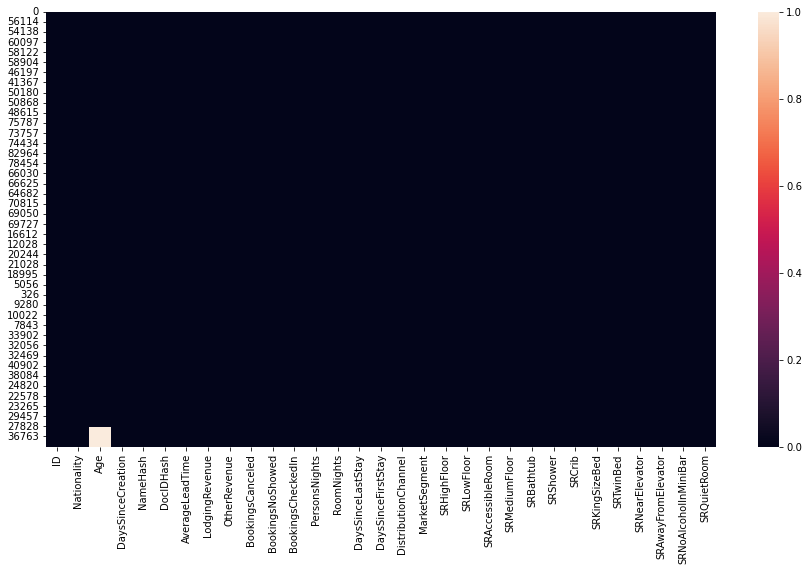

In [18]:
plt.figure(figsize = (15,8))
sns.heatmap(df.isnull().sort_values(by="Age"))

In [19]:
df.describe()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,83590.000000,79811.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,...,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000
mean,41795.500000,45.398028,453.640902,66.196028,298.802087,67.589132,0.002022,0.000634,0.794617,4.649133,...,0.000873,0.002847,0.001711,0.013219,0.352686,0.142541,0.000335,0.003505,0.000120,0.088372
std,24130.498838,16.572368,313.390291,87.758990,372.851892,114.327776,0.066770,0.029545,0.695778,4.567673,...,0.029539,0.053284,0.041326,0.114213,0.477809,0.349606,0.018299,0.059101,0.010937,0.283837
min,1.000000,-11.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20898.250000,34.000000,177.000000,0.000000,59.000000,2.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41795.500000,46.000000,397.000000,29.000000,234.000000,38.500000,0.000000,0.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62692.750000,57.000000,723.000000,103.000000,402.000000,87.675000,0.000000,0.000000,1.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,83590.000000,122.000000,1095.000000,588.000000,21781.000000,7730.250000,9.000000,3.000000,66.000000,116.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As the percentage of nulls is 4.5% over the total data, I will remove them, because it will not affect our data and to our analysis.

Besides, I checked that in the variable **"Age"**, minimum age is -11 years old. Definition: Customer's age (in years) at the last day of the extraction period. So, I will proceed to eliminate not only the nulls registers but also those whose value is negative.

In [20]:
df=df.dropna(subset=['Age'])

In [21]:
df.isna().sum()

ID                      0
Nationality             0
Age                     0
DaysSinceCreation       0
NameHash                0
DocIDHash               0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DaysSinceLastStay       0
DaysSinceFirstStay      0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
dtype: int64

In [22]:
df = df[df['Age'] > 0]

In [23]:
df.describe()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,79752.000000,79752.000000,79752.000000,79752.000000,79752.000000,79752.000000,79752.000000,79752.000000,79752.000000,79752.000000,...,79752.000000,79752.000000,79752.000000,79752.000000,79752.000000,79752.000000,79752.000000,79752.000000,79752.000000,79752.000000
mean,42316.986684,45.433143,446.583847,66.823904,302.323415,67.989468,0.001843,0.000577,0.793334,4.700973,...,0.000878,0.002922,0.001781,0.013066,0.357232,0.143507,0.000351,0.003574,0.000125,0.090944
std,24005.767617,16.527807,310.560050,87.983900,368.080128,112.665538,0.065937,0.028323,0.690439,4.587553,...,0.029614,0.053973,0.042159,0.113556,0.479187,0.350592,0.018734,0.059673,0.011197,0.287532
min,1.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21681.750000,34.000000,174.000000,0.000000,64.800000,2.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42369.500000,46.000000,385.000000,30.000000,236.000000,40.000000,0.000000,0.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,63173.250000,57.000000,703.000000,104.000000,407.425000,88.500000,0.000000,0.000000,1.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,83590.000000,122.000000,1095.000000,588.000000,9682.400000,7730.250000,9.000000,3.000000,66.000000,116.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


On the other hand, there is another inconsistent data. The minimum **"AvergagedLeadTime"** is -1, so it has not sense for this variable. Definition: The average number of days elapsed between the customer's booking date and arrival date. In other words, this variable is calculated by dividing the sum of the number of days elapsed between the moment each booking was made and its arrival date, by the total of bookings made by the customer.

I will proceed to eliminate those negative registers.

In [24]:
df = df[df['AverageLeadTime'] >= 0] 

In [25]:
df.describe()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,79743.000000,79743.000000,79743.000000,79743.000000,79743.000000,79743.000000,79743.000000,79743.000000,79743.000000,79743.000000,...,79743.000000,79743.000000,79743.000000,79743.000000,79743.000000,79743.000000,79743.000000,79743.000000,79743.000000,79743.000000
mean,42315.228033,45.432978,446.608091,66.831559,302.339996,67.996627,0.001843,0.000577,0.793311,4.701240,...,0.000878,0.002922,0.001781,0.013067,0.357273,0.143524,0.000351,0.003574,0.000125,0.090955
std,24006.233104,16.527981,310.566075,87.985915,368.097088,112.669856,0.065940,0.028324,0.690474,4.587737,...,0.029615,0.053976,0.042161,0.113562,0.479199,0.350608,0.018735,0.059676,0.011198,0.287546
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21679.500000,34.000000,174.000000,0.000000,64.730000,2.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42366.000000,46.000000,385.000000,30.000000,236.000000,40.000000,0.000000,0.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,63173.500000,57.000000,703.000000,104.000000,407.500000,88.500000,0.000000,0.000000,1.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,83590.000000,122.000000,1095.000000,588.000000,9682.400000,7730.250000,9.000000,3.000000,66.000000,116.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Ordeno la tabla por DaysSinceCreation.

In [26]:
df.groupby("DaysSinceCreation", group_keys=True).apply(lambda x: x)

ID Nationality   Age  DaysSinceCreation  \
DaysSinceCreation                                                     
0                 83493  83494         FIN  47.0                  0   
                  83494  83495         FIN  13.0                  0   
                  83495  83496         FIN  47.0                  0   
                  83496  83497         FIN  11.0                  0   
                  83497  83498         GBR  42.0                  0   
...                        ...         ...   ...                ...   
1095              64        65         HUN  59.0               1095   
                  66        67         FRA  50.0               1095   
                  67        68         FRA  13.0               1095   
                  68        69         FRA  51.0               1095   
                  70        71         ESP  61.0               1095   

                                                                  NameHash  \
DaysSinceCreation                                                            
0                 83493  0x977AE7635814826F82B7B367D6B9431CB172D979FE4F...   
                  83494  0xFF59F38F7BFF912247CCFB260B37518C6E0891B75B55...   
                  83495  0x827CB636500C3C1E15773FB165727795167C7334E8AE...   
                  83496  0x6AA1FC11FF74B8A64D2118ADFF390FC3F96FEED9887B...   
                  83497  0xC8DBD7E318CD24262BD97255CE3A80AF7F8931E7D153...   
...                                                                    ...   
1095              64     0xF32C2F76E8A7FE05361018575CAFBD7027A9B97DD2EA...   
                  66     0x37F6BF08A267DA65C31063A35172E33D0529FDA0D00C...   
                  67     0x0A5D1532BFB2FDCBF7861FCC86D0F57199A07BE246E5...   
                  68     0x1EA6E44D4AA85EF9B492CFF22E1717FACC9D7D51B2F7...   
                  70     0x4ED8F3499BBB0FBDE485243DB4DDBAF57B961D08CFD5...   

                                                                 DocIDHash  \
DaysSinceCreation                                                            
0                 83493  0xC61635C02837D1E3BA947B74C42C3950D40396FA8CD6...   
                  83494  0xA6738E9DC66BF3947AF160D86602E791AFC1867ECB9B...   
                  83495  0x55A4CA8F7473E6C2C3EBA0E866ABE6DBD9B2C4FFE62B...   
                  83496  0x09082291A18298C5C79B6F8F0BCF34226058DB1B4890...   
                  83497  0xD9E18B28871CF90297C39CC0945F46585481753E354D...   
...                                                                    ...   
1095              64     0x57BBBD7FA724ED22BADFB8EA5BC2A337A5BF6F390B89...   
                  66     0x1EA52AAF7DFC02828B9661DCB85BBB7564138EFF49EA...   
                  67     0x8BDF50DFBCB267507E268A26F639952FBAFEBC436B06...   
                  68     0xFF27534A489F868834CE45A2B7A82D59BF7DFC389EB9...   
                  70     0xFFBC8DC913F83F0471D31E6B1FB1CE4B3D5F94E7E9F8...   

                         AverageLeadTime  LodgingRevenue  OtherRevenue  \
DaysSinceCreation                                                        
0                 83493                8          1022.0        100.00   
                  83494                0             0.0          0.00   
                  83495                0             0.0          0.00   
                  83496                0             0.0          0.00   
                  83497                0           349.6         56.25   
...                                  ...             ...           ...   
1095              64                   0             0.0          0.00   
                  66                  96           300.0        284.97   
                  67                   0             0.0          0.00   
                  68                   0             0.0          0.00   
                  70                   0             0.0          0.00   

                         BookingsCanceled  ...  SRMediumFloor  SRBathtub  \
DaysSinceCreation                  

In [27]:
df.nunique()

ID                      79743
Nationality               187
Age                        98
DaysSinceCreation        1095
NameHash                77308
DocIDHash               76693
AverageLeadTime           416
LodgingRevenue          10028
OtherRevenue             4393
BookingsCanceled            6
BookingsNoShowed            4
BookingsCheckedIn          28
PersonsNights              54
RoomNights                 45
DaysSinceLastStay        1105
DaysSinceFirstStay       1106
DistributionChannel         4
MarketSegment               7
SRHighFloor                 2
SRLowFloor                  2
SRAccessibleRoom            2
SRMediumFloor               2
SRBathtub                   2
SRShower                    2
SRCrib                      2
SRKingSizeBed               2
SRTwinBed                   2
SRNearElevator              2
SRAwayFromElevator          2
SRNoAlcoholInMiniBar        2
SRQuietRoom                 2
dtype: int64

Elimino las features "ID", "NameHash" y "DocIDHash", ya que no son importantes para el estudio del modelo de ML.

In [28]:
df1 = df.drop(['ID', 'NameHash', 'DocIDHash'], axis=1)

In [29]:
df1.head(15)

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,PRT,51.0,150,45,371.0,105.3,1,0,3,8,...,0,0,0,0,0,0,0,0,0,0
2,DEU,31.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,FRA,60.0,1095,93,240.0,60.0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,0
4,FRA,51.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,JPN,54.0,1095,58,230.0,24.0,0,0,1,4,...,0,0,0,0,0,0,0,0,0,0
6,JPN,49.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,FRA,32.0,1095,38,535.0,94.0,0,0,1,10,...,0,0,0,0,1,0,0,0,0,0
8,FRA,42.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,IRL,25.0,1095,96,174.0,69.0,0,0,1,6,...,0,0,0,0,0,0,0,0,0,0
10,IRL,27.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df1.dtypes

Nationality              object
Age                     float64
DaysSinceCreation         int64
AverageLeadTime           int64
LodgingRevenue          float64
OtherRevenue            float64
BookingsCanceled          int64
BookingsNoShowed          int64
BookingsCheckedIn         int64
PersonsNights             int64
RoomNights                int64
DaysSinceLastStay         int64
DaysSinceFirstStay        int64
DistributionChannel      object
MarketSegment            object
SRHighFloor               int64
SRLowFloor                int64
SRAccessibleRoom          int64
SRMediumFloor             int64
SRBathtub                 int64
SRShower                  int64
SRCrib                    int64
SRKingSizeBed             int64
SRTwinBed                 int64
SRNearElevator            int64
SRAwayFromElevator        int64
SRNoAlcoholInMiniBar      int64
SRQuietRoom               int64
dtype: object

There are 187 source markets, with the top 20 markets are included more than 90% of the instances (customers). In order to realize a one hot encoder it is necessary to reduce the dimensionality of the database with the less important markets.

In [31]:
df1['Nationality'].nunique()

187

In [32]:
top_20_markets = df1['Nationality'].value_counts().head(20)
names = top_20_markets.keys()

In [33]:
top_20_markets

FRA    12409
DEU    10224
GBR     8648
PRT     7813
ESP     4898
USA     3426
ITA     3363
BEL     3118
BRA     2896
NLD     2723
CHE     2106
IRL     1996
CAN     1523
AUT     1488
SWE     1231
ISR      900
CHN      890
NOR      794
POL      759
AUS      723
Name: Nationality, dtype: int64

In [34]:
names

Index(['FRA', 'DEU', 'GBR', 'PRT', 'ESP', 'USA', 'ITA', 'BEL', 'BRA', 'NLD',
       'CHE', 'IRL', 'CAN', 'AUT', 'SWE', 'ISR', 'CHN', 'NOR', 'POL', 'AUS'],
      dtype='object')

In [35]:
top_20_markets.sum()

71928

In [36]:
df1['Nationality'].value_counts().sum()

79743

In [37]:
perc_top_20_markets = (top_20_markets.sum() / df1['Nationality'].value_counts().sum())*100

In [38]:
perc_top_20_markets 

90.19976675068658

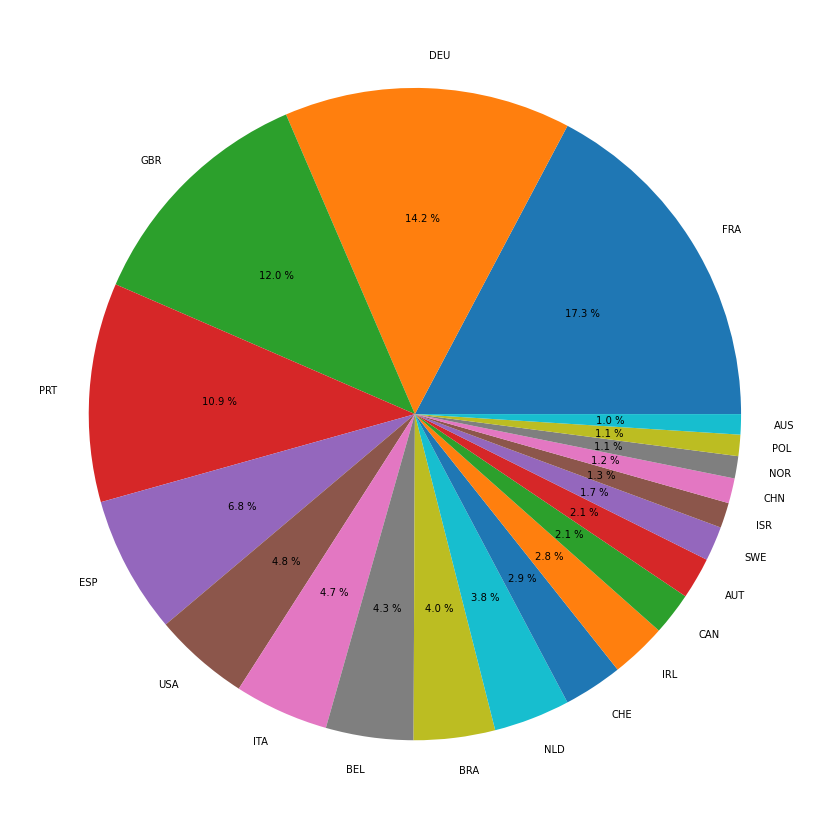

In [39]:
plt.figure(figsize=(20,15))
plt.pie(top_20_markets, labels=names, autopct="%0.1f %%")
plt.show()

In [40]:
num_of_countries = df['Nationality'].nunique()
print('The number of source markets before preprocessing is %s' %num_of_countries)

The number of source markets before preprocessing is 187


In [41]:
df1.Nationality

0        PRT
2        DEU
3        FRA
4        FRA
5        JPN
        ... 
83585    ITA
83586    IRL
83587    IRL
83588    IRL
83589    IRL
Name: Nationality, Length: 79743, dtype: object

In [42]:
df1 = df1[df1['Age'] < 100]
df1

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,PRT,51.0,150,45,371.0,105.3,1,0,3,8,...,0,0,0,0,0,0,0,0,0,0
2,DEU,31.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,FRA,60.0,1095,93,240.0,60.0,0,0,1,10,...,0,0,0,0,0,0,0,0,0,0
4,FRA,51.0,1095,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,JPN,54.0,1095,58,230.0,24.0,0,0,1,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,ITA,54.0,0,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83586,IRL,47.0,0,109,327.1,277.5,0,0,1,6,...,0,0,0,0,1,0,0,0,0,0
83587,IRL,53.0,0,0,0.0,0.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
83588,IRL,85.0,0,109,981.3,9.0,0,0,1,6,...,0,0,0,0,0,1,0,0,0,0


In [43]:
names_top20 = df1.groupby('Nationality').count().sort_values(by = 'Age', ascending = False)
top_20_source_market = list(names_top20[names_top20['Age'] < 724]['Age'].keys())

for i in top_20_source_market:
    df1['Nationality'] = df1['Nationality'].str.replace(i,'')
    
print('The number of top source markets after deleting those with less than 724 instances is: %s' %df1['Nationality'].nunique())

The number of top source markets after deleting those with less than 724 instances is: 20


I create new features, by combining the existing features given in the dataset;

* **Total Revenue** It is the addition of LodingRevenue and OtherRevenue.
* **ADR (Average Daily Rate)** A hotel's average daily rate (ADR) is the average price guests pay for rooms. It can be measured on a given night or over a specific period of time, such as a month or a year.
* **ALOS (Average length of stay)** refers to the number of nights guests stay on average over a given period of time, usually a month or a year.

In [44]:
df1['TotalRevenue'] = df1['LodgingRevenue'] + df1['OtherRevenue']

In [45]:
df1.groupby('TotalRevenue')['Nationality'].unique().str[0]

TotalRevenue
0.00        DEU
1.00        PRT
2.00        PRT
2.50        FRA
3.00        ESP
           ... 
9576.80     GBR
10324.50       
10982.40    USA
11081.15    PRT
11930.66    DEU
Name: Nationality, Length: 16374, dtype: object

In [46]:
df1["ADR"] = df1["LodgingRevenue"]/df1["RoomNights"]

In [47]:
df1["ADR"]

0         74.200000
2               NaN
3         48.000000
4               NaN
5        115.000000
            ...    
83585           NaN
83586    109.033333
83587           NaN
83588    327.100000
83589           NaN
Name: ADR, Length: 79735, dtype: float64

In [48]:
df1["ALOS"]= df1["RoomNights"]/df1["BookingsCheckedIn"]

In [49]:
df1["ALOS"]

0        1.666667
2             NaN
3        5.000000
4             NaN
5        2.000000
           ...   
83585         NaN
83586    3.000000
83587         NaN
83588    3.000000
83589         NaN
Name: ALOS, Length: 79735, dtype: float64

In [50]:
df1.dtypes

Nationality              object
Age                     float64
DaysSinceCreation         int64
AverageLeadTime           int64
LodgingRevenue          float64
OtherRevenue            float64
BookingsCanceled          int64
BookingsNoShowed          int64
BookingsCheckedIn         int64
PersonsNights             int64
RoomNights                int64
DaysSinceLastStay         int64
DaysSinceFirstStay        int64
DistributionChannel      object
MarketSegment            object
SRHighFloor               int64
SRLowFloor                int64
SRAccessibleRoom          int64
SRMediumFloor             int64
SRBathtub                 int64
SRShower                  int64
SRCrib                    int64
SRKingSizeBed             int64
SRTwinBed                 int64
SRNearElevator            int64
SRAwayFromElevator        int64
SRNoAlcoholInMiniBar      int64
SRQuietRoom               int64
TotalRevenue            float64
ADR                     float64
ALOS                    float64
dtype: o

# <b>4 <span style='color:#DC33FF'>|</span> OneHotEncoding</b>

En este dataset, las características categóricas son las correspondientes a los tipos "object". Extraemos la lista de estas características usando el método select_dtypes de pandas.

In [51]:
cat_features = df1.select_dtypes(include = ["object"]).columns
cat_features

Index(['Nationality', 'DistributionChannel', 'MarketSegment'], dtype='object')

In [52]:
cat_df1 = pd.get_dummies(df1[cat_features], drop_first = True)
cat_df1.head()

,Nationality_AUT,Nationality_BEL,Nationality_BRA,Nationality_CAN,Nationality_CHE,Nationality_CHN,Nationality_DEU,Nationality_ESP,Nationality_FRA,Nationality_GBR,...,Nationality_USA,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


* drop_first = True, que elimina la primera de las columnas generadas para cada característica con el objetivo de evitar la colinealidad (que una de las columnas sea combinación lineal de las demás)

Ahora, basta eliminar las características originales:

In [53]:
df1.drop(cat_features, axis = 1, inplace = True)

Y procecemos a concatenar el dataframe resultante con el dataframe que hemos generado con las características "dummies":

In [54]:
df1 = pd.concat([df1, cat_df1], axis = 1)

In [55]:
print(df1.columns.tolist())
type(df1.columns.tolist())

['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights', 'DaysSinceLastStay', 'DaysSinceFirstStay', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'TotalRevenue', 'ADR', 'ALOS', 'Nationality_AUT', 'Nationality_BEL', 'Nationality_BRA', 'Nationality_CAN', 'Nationality_CHE', 'Nationality_CHN', 'Nationality_DEU', 'Nationality_ESP', 'Nationality_FRA', 'Nationality_GBR', 'Nationality_IRL', 'Nationality_ISR', 'Nationality_ITA', 'Nationality_NLD', 'Nationality_NOR', 'Nationality_POL', 'Nationality_PRT', 'Nationality_SWE', 'Nationality_USA', 'DistributionChannel_Direct', 'DistributionChannel_Electronic Distribution', 'DistributionChannel_Travel Agent/Operator', 'MarketSegment_Complementary', 'MarketSegment_Corporate', '

list

In [56]:
df1.dtypes

Age                                            float64
DaysSinceCreation                                int64
AverageLeadTime                                  int64
LodgingRevenue                                 float64
OtherRevenue                                   float64
BookingsCanceled                                 int64
BookingsNoShowed                                 int64
BookingsCheckedIn                                int64
PersonsNights                                    int64
RoomNights                                       int64
DaysSinceLastStay                                int64
DaysSinceFirstStay                               int64
SRHighFloor                                      int64
SRLowFloor                                       int64
SRAccessibleRoom                                 int64
SRMediumFloor                                    int64
SRBathtub                                        int64
SRShower                                         int64
SRCrib    

# <b>5 <span style='color:#DC33FF'>|</span> Defining X, y</b>

In [57]:
y = df1["AverageLeadTime"]
X = df1.drop(columns=["AverageLeadTime"])

In [58]:
X

,Age,DaysSinceCreation,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,...,Nationality_USA,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,51.0,150,371.0,105.3,1,0,3,8,5,151,...,0,0,0,0,0,1,0,0,0,0
2,31.0,1095,0.0,0.0,0,0,0,0,0,-1,...,0,0,0,1,0,0,0,0,0,1
3,60.0,1095,240.0,60.0,0,0,1,10,5,1100,...,0,0,0,1,0,0,0,0,0,1
4,51.0,1095,0.0,0.0,0,0,0,0,0,-1,...,0,0,0,1,0,0,0,0,0,1
5,54.0,1095,230.0,24.0,0,0,1,4,2,1097,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,54.0,0,0.0,0.0,0,0,0,0,0,-1,...,0,0,0,1,0,0,0,0,1,0
83586,47.0,0,327.1,277.5,0,0,1,6,3,3,...,0,0,0,1,0,0,0,0,1,0
83587,53.0,0,0.0,0.0,0,0,0,0,0,-1,...,0,0,0,1,0,0,0,0,1,0
83588,85.0,0,981.3,9.0,0,0,1,6,3,3,...,0,0,0,1,0,0,0,0,1,0


In [59]:
y

0         45
2          0
3         93
4          0
5         58
        ... 
83585      0
83586    109
83587      0
83588    109
83589      0
Name: AverageLeadTime, Length: 79735, dtype: int64

# <b>6 <span style='color:#DC33FF'>|</span> Train Test Split</b>

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [61]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((63788, 55), (15947, 55), (63788,), (15947,))

In [62]:
X_train

,Age,DaysSinceCreation,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,...,Nationality_USA,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
55830,45.0,232,514.4,56.0,0,0,1,8,4,236,...,0,0,0,1,0,0,0,0,1,0
14051,57.0,840,108.0,88.0,0,0,1,4,2,842,...,0,0,0,1,0,0,0,1,0,0
3025,46.0,1020,419.4,84.0,0,0,1,4,2,1022,...,0,0,0,1,0,0,0,0,1,0
55537,20.0,235,0.0,0.0,0,0,0,0,0,-1,...,0,1,0,0,0,0,1,0,0,0
48585,37.0,293,0.0,0.0,0,0,0,0,0,-1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22045,58.0,693,299.2,88.0,0,0,1,8,4,697,...,0,0,0,1,0,0,0,0,1,0
27607,30.0,604,168.0,23.0,0,0,1,2,1,605,...,0,0,0,1,0,0,0,0,1,0
8592,66.0,924,116.1,5.0,0,0,1,2,1,925,...,0,0,0,1,0,0,0,0,1,0
6913,56.0,951,1916.0,173.1,0,0,2,19,19,924,...,0,0,0,0,0,0,0,0,0,0


In [63]:
y_train

55830    299
14051     47
3025      31
55537      0
48585      0
        ... 
22045    139
27607     11
8592      68
6913       1
74574    270
Name: AverageLeadTime, Length: 63788, dtype: int64

# <b>7 <span style='color:#DC33FF'>|</span> Trying different models</b>

In [67]:
models = {
    "LinearRegression":LinearRegression(),
    "Poly_2":Pipeline([("poly_features", PolynomialFeatures(degree=2)),
                       ("linear_regression", LinearRegression())]),
    "Poly_3":Pipeline([("poly_features", PolynomialFeatures(degree=3)),
                       ("linear_regression", LinearRegression())]),   
    "Poly_4":Pipeline([("poly_features", PolynomialFeatures(degree=4)),
                       ("linear_regression", LinearRegression())]),     
    "Poly_5":Pipeline([("poly_features", PolynomialFeatures(degree=5)),
                       ("linear_regression", LinearRegression())]),
    "Lasso": Lasso(alpha=1),
    "Ridge": Ridge(alpha=1),
    "Support Vector Machine": SVR(),
    "SGD": SGDRegressor(max_iter=10000),
    "Random Forrest": RandomForestRegressor(),
    "Polynomial_dg_2_Lasso": Pipeline([("poly", PolynomialFeatures(degree=3)),
                                      ("Lasso", Lasso (alpha=10))]),  
}

NameError: name 'Lasso' is not defined

In [68]:
results_train = {}
resluts_test = {}

for name, model in models.items():
    print(f"Training {name}")
    model.fit(X_train, y_train)
    results_train[name] = mse(y_train, model.predict(X_train))**5
    results_test[name] = mse(y_test, model.predict(X_test))**5

NameError: name 'models' is not defined

In [69]:
results_train

{}

In [70]:
results_test

NameError: name 'results_test' is not defined

In [324]:
X_train

,Nationality,Age,DaysSinceCreation,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
29254,FRA,50.0,582,972.00,99.0,0,0,1,6,3,...,0,0,0,0,0,0,0,0,0,0
6226,FRA,39.0,962,992.00,78.0,0,0,1,2,2,...,0,0,0,0,0,0,0,0,0,0
56586,CHE,11.0,225,0.00,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51960,BRA,66.0,264,384.48,63.0,0,0,1,9,3,...,0,0,0,0,1,0,0,0,0,0
59845,FRA,47.0,199,238.00,14.0,0,0,1,2,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75104,IRL,28.0,86,0.00,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
29681,BEL,44.0,575,345.60,42.0,0,0,1,6,2,...,0,0,0,0,0,1,0,0,0,0
14751,GBR,30.0,831,358.00,51.5,0,0,1,2,2,...,0,0,0,0,0,0,0,0,0,0
55835,EST,28.0,232,0.00,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [303]:
from sklearn. preprocessing import OneHotEncoder

In [304]:
X_train = pd.get_dummies(X_train, prefix = "", prefix_sep="")

In [305]:
X_train.head()

,Age,DaysSinceCreation,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,...,Direct,Electronic Distribution,Travel Agent/Operator,Aviation,Complementary,Corporate,Direct,Groups,Other,Travel Agent/Operator
75032,70.0,87,0.0,0.0,0,0,0,0,0,-1,...,1,0,0,0,0,0,1,0,0,0
42024,34.0,390,74.0,7.0,0,0,1,1,1,391,...,0,0,1,0,0,0,0,1,0,0
24209,55.0,655,241.3,56.0,0,0,1,8,4,659,...,0,0,1,0,0,0,0,0,1,0
35068,36.0,494,436.0,31.0,0,0,1,4,4,498,...,0,0,1,0,0,0,0,0,0,1
75293,60.0,85,0.0,0.0,0,0,0,0,0,-1,...,0,0,1,0,0,0,0,0,1,0


In [306]:
X_train.shape

(63794, 216)

In [307]:
ohe = OneHotEncoder(handle_unknown='ignore')

In [308]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [309]:
X_train["Nationality"]

29254    FRA
6226     FRA
56586    CHE
51960    BRA
59845    FRA
        ... 
75104    IRL
29681    BEL
14751    GBR
55835    EST
51105    GBR
Name: Nationality, Length: 59807, dtype: object

In [310]:
X_train["DistributionChannel"]

29254    Travel Agent/Operator
6226                    Direct
56586                   Direct
51960    Travel Agent/Operator
59845    Travel Agent/Operator
                 ...          
75104    Travel Agent/Operator
29681    Travel Agent/Operator
14751                Corporate
55835    Travel Agent/Operator
51105    Travel Agent/Operator
Name: DistributionChannel, Length: 59807, dtype: object

In [311]:
X_train["MarketSegment"]

29254        Other
6226        Direct
56586       Direct
51960        Other
59845       Groups
           ...    
75104        Other
29681        Other
14751    Corporate
55835       Groups
51105        Other
Name: MarketSegment, Length: 59807, dtype: object

In [312]:
type(X_train[["Nationality"]])

pandas.core.frame.DataFrame

In [313]:
ohe.fit(X_train[["DistributionChannel"]])

OneHotEncoder(handle_unknown='ignore')

In [314]:
ohe.fit(X_train[["MarketSegment"]])

OneHotEncoder(handle_unknown='ignore')

In [315]:
ohe.fit(X_train[["Nationality"]])

OneHotEncoder(handle_unknown='ignore')

In [316]:
ohe.categories_

[array(['ABW', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM',
        'ATA', 'ATF', 'ATG', 'AUS', 'AUT', 'AZE', 'BEL', 'BEN', 'BGD',
        'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BOL', 'BRA', 'BRB', 'BWA',
        'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COL',
        'COM', 'CPV', 'CRI', 'CUB', 'CYM', 'CYP', 'CZE', 'DEU', 'DMA',
        'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESP', 'EST', 'ETH',
        'FIN', 'FRA', 'FRO', 'GAB', 'GBR', 'GEO', 'GHA', 'GIB', 'GIN',
        'GNB', 'GNQ', 'GRC', 'GTM', 'GUY', 'HKG', 'HRV', 'HTI', 'HUN',
        'IDN', 'IND', 'IOT', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA',
        'JAM', 'JEY', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KOR', 'KWT',
        'LAO', 'LBN', 'LBY', 'LCA', 'LIE', 'LKA', 'LTU', 'LUX', 'LVA',
        'MAR', 'MCO', 'MDG', 'MDV', 'MEX', 'MKD', 'MLI', 'MLT', 'MMR',
        'MNE', 'MOZ', 'MUS', 'MWI', 'MYS', 'NAM', 'NCL', 'NGA', 'NIC',
        'NLD', 'NOR', 'NPL', 'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL',
      

In [317]:
encoded_Nationality_train = ohe.transform(X_train[["Nationality"]])

In [321]:
encoded_Nationality_train.todense()[:2]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [319]:
encoded_DistributionChannel_train = ohe.transform(X_train[["DistributionChannel"]])

/home/iremirezdeganuza/miniconda3/envs/cohortes/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- DistributionChannel
Feature names seen at fit time, yet now missing:
- Nationality

  warnings.warn(message, FutureWarning)


In [322]:
encoded_DistributionChannel_train.todense()[:2]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [320]:
encoded_MarketSegment_train = ohe.transform(X_train[["MarketSegment"]])

/home/iremirezdeganuza/miniconda3/envs/cohortes/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- MarketSegment
Feature names seen at fit time, yet now missing:
- Nationality

  warnings.warn(message, FutureWarning)


In [264]:
encoded_MarketSegment_train.todense()[:2]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [240]:
encoded_Nationality_train = pd.DataFrame(encoded_Nationality_train, index=X_train.index)
pd.concat([X_train, encoded_Nationality_train], axis=1)

,Nationality,Age,DaysSinceCreation,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,0
38532,NLD,53.0,446,1428.0,112.0,0,0,1,7,7,...,0,0,0,0,0,0,0,0,0,"(0, 117)\t1.0"
71057,AUT,58.0,116,755.0,255.5,0,0,1,10,5,...,0,0,0,1,0,0,0,0,0,"(0, 13)\t1.0"
59349,DEU,48.0,204,288.0,14.0,0,0,1,2,2,...,0,0,0,0,0,0,0,0,0,"(0, 43)\t1.0"
68802,GBR,8.0,132,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"(0, 60)\t1.0"
47381,PRT,63.0,305,109.0,34.5,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,"(0, 131)\t1.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32825,BRA,65.0,529,120.0,45.5,0,0,1,2,1,...,0,0,0,1,0,0,0,0,0,"(0, 24)\t1.0"
32451,DEU,80.0,534,139.0,54.0,0,0,1,2,2,...,0,0,0,0,0,0,0,0,0,"(0, 43)\t1.0"
24404,FRA,48.0,652,79.2,22.0,0,0,1,2,1,...,0,0,0,0,0,0,0,0,0,"(0, 57)\t1.0"
41974,DEU,63.0,392,198.0,4.0,0,0,1,4,2,...,0,0,0,0,1,0,0,0,0,"(0, 43)\t1.0"


In [241]:
Nationality_ohe_test = ohe.transform(X_test[["Nationality"]]).todense()
Nationality_ohe_test = pd.DataFrame(Nationality_ohe_test, index=X_test.index)
pd.concat([X_test, Nationality_ohe_test], axis=1).head()

,Nationality,Age,DaysSinceCreation,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,...,165,166,167,168,169,170,171,172,173,174
31946,CHE,33.0,542,126.00,14.0,0,0,1,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80806,PRT,5.0,36,0.00,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2701,PRT,64.0,1025,318.75,292.5,0,0,1,10,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
658,FRA,55.0,1071,138.00,126.5,0,0,1,6,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77138,USA,71.0,72,411.00,129.5,0,0,1,6,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [242]:
pd.get_dummies(X_test.iloc[:5])

,Age,DaysSinceCreation,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,...,SRQuietRoom,Nationality_CHE,Nationality_FRA,Nationality_PRT,Nationality_USA,DistributionChannel_Direct,DistributionChannel_Travel Agent/Operator,MarketSegment_Direct,MarketSegment_Other,MarketSegment_Travel Agent/Operator
31946,33.0,542,126.00,14.0,0,0,1,2,1,543,...,0,1,0,0,0,0,1,0,1,0
80806,5.0,36,0.00,0.0,0,0,0,0,0,-1,...,0,0,0,1,0,1,0,1,0,0
2701,64.0,1025,318.75,292.5,0,0,1,10,5,1030,...,0,0,0,1,0,0,1,0,1,0
658,55.0,1071,138.00,126.5,0,0,1,6,3,1074,...,0,0,1,0,0,0,1,0,0,1
77138,71.0,72,411.00,129.5,0,0,1,6,3,75,...,1,0,0,0,1,0,1,0,1,0


In [213]:
ohe.transform(X_test.iloc[:2][["Nationality"]]).todense()

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 

It is important to use the same instance of encoder. We will use pd.get_dummies.

In [244]:
X_dummies = pd.get_dummies(X, columns=["Nationality", "DistributionChannel","MarketSegment"])

In [245]:
X_dummies

,Age,DaysSinceCreation,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,...,DistributionChannel_Direct,DistributionChannel_Electronic Distribution,DistributionChannel_Travel Agent/Operator,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Direct,MarketSegment_Groups,MarketSegment_Other,MarketSegment_Travel Agent/Operator
0,51.0,150,371.0,105.3,1,0,3,8,5,151,...,0,0,0,0,0,1,0,0,0,0
2,31.0,1095,0.0,0.0,0,0,0,0,0,-1,...,0,0,1,0,0,0,0,0,0,1
3,60.0,1095,240.0,60.0,0,0,1,10,5,1100,...,0,0,1,0,0,0,0,0,0,1
4,51.0,1095,0.0,0.0,0,0,0,0,0,-1,...,0,0,1,0,0,0,0,0,0,1
5,54.0,1095,230.0,24.0,0,0,1,4,2,1097,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,54.0,0,0.0,0.0,0,0,0,0,0,-1,...,0,0,1,0,0,0,0,0,1,0
83586,47.0,0,327.1,277.5,0,0,1,6,3,3,...,0,0,1,0,0,0,0,0,1,0
83587,53.0,0,0.0,0.0,0,0,0,0,0,-1,...,0,0,1,0,0,0,0,0,1,0
83588,85.0,0,981.3,9.0,0,0,1,6,3,3,...,0,0,1,0,0,0,0,0,1,0


In [219]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y)

In [220]:
X_train.shape

(59807, 213)

In [223]:
y_test.iloc[1:5]

74355     0
21750    66
40898    12
50326     0
Name: AverageLeadTime, dtype: int64

In [225]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

In [227]:
lr = LinearRegression()

In [229]:
lr.fit(X_train, y_train)

ValueError: could not convert string to float: 'Travel Agent/Operator'

# <b>4 <span style='color:#fff700ba'>|</span> KMeans</b>